In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df.head()

,SBETa\n(m2/g),Vb\rtoal\r(cm3/g),Vc\rmicro\r(cm3/g),C,H,N,O *,adb
0,1281.60,0.71,0.32,69.22,3.99,0.08,26.30,2.63
1,0.56,0.22,64.83,3.64,0.38,30.77,2.59,NaN
2,0.83,0.36,72.41,3.63,0.01,23.59,2.92,NaN
3,0.85,0.33,69.51,4.35,0.76,24.94,2.44,NaN
4,0.36,NaN,NaN,NaN,NaN,NaN,3.23,NaN


In [41]:
df.describe()
print(df.columns)

Index(['SBETa\n(m2/g)', 'Vb\rtoal\r(cm3/g)', 'Vc\rmicro\r(cm3/g)', 'C', 'H',
       'N', 'O *', 'adb'],
      dtype='object')


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

) missing from current font.on3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 13 (
  fig.canvas.draw()


<Axes: >

) missing from current font.es/IPython/core/events.py:82: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from current font.es/IPython/core/pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


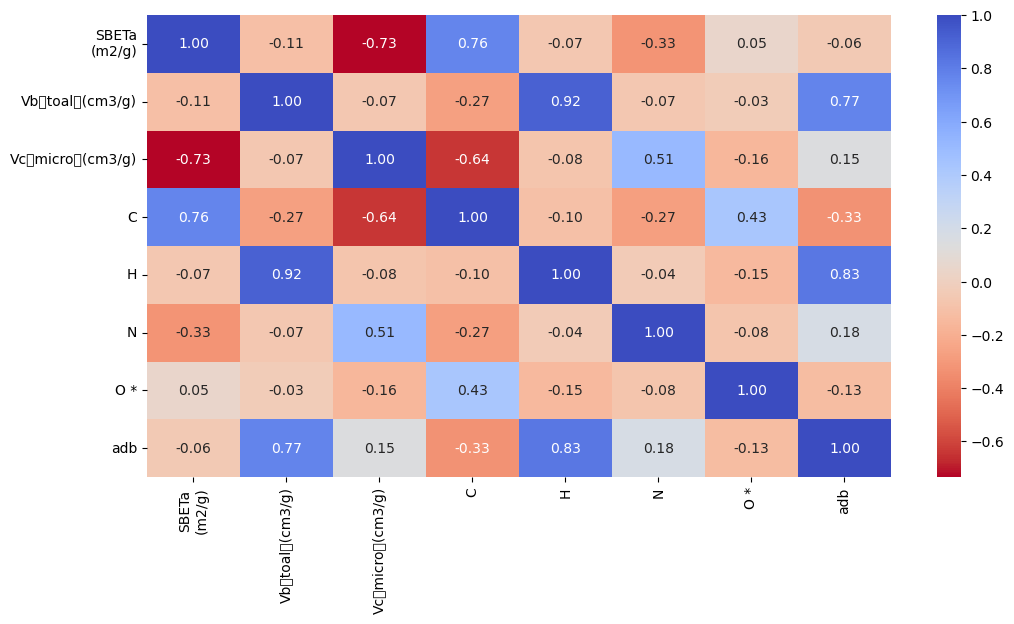

In [110]:
correlations = df.corr()
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm_r", fmt = ".2f")

) missing from current font.on3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 13 (
  fig.canvas.draw()


<Axes: >

) missing from current font.es/IPython/core/events.py:82: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from current font.es/IPython/core/pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


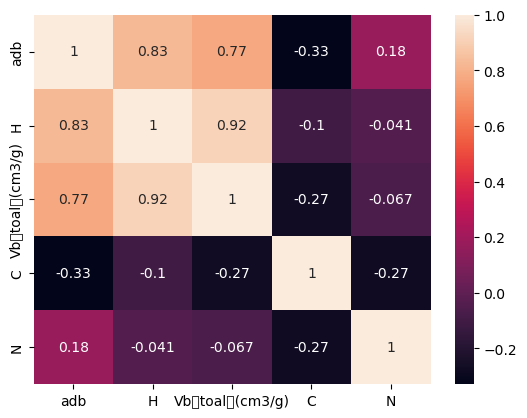

In [113]:
top_features = correlations["adb"].abs().sort_values(ascending=False).head(5).index
sns.heatmap(df[top_features].corr(), annot = True)

In [46]:
from sklearn.model_selection import train_test_split

X = df[["SBETa\n(m2/g)", "Vb\rtoal\r(cm3/g)", "Vc\rmicro\r(cm3/g)", "C", "H", "N", "O *"]]
y = df["adb"]

y = y.fillna(y.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)

In [47]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [48]:
model = HistGradientBoostingRegressor()

In [49]:
model.fit(X, y)

HistGradientBoostingRegressor()

In [50]:
y_pred = model.predict(X_test)

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [52]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [53]:
print("MAE: ", mae)
print("MSE: ", mse)
print("R2 score: ", r2)

MAE:  0.2731415607900383
MSE:  0.4878467942167679
R2 score:  0.7978924540216926


In [54]:
import matplotlib.pyplot as plt

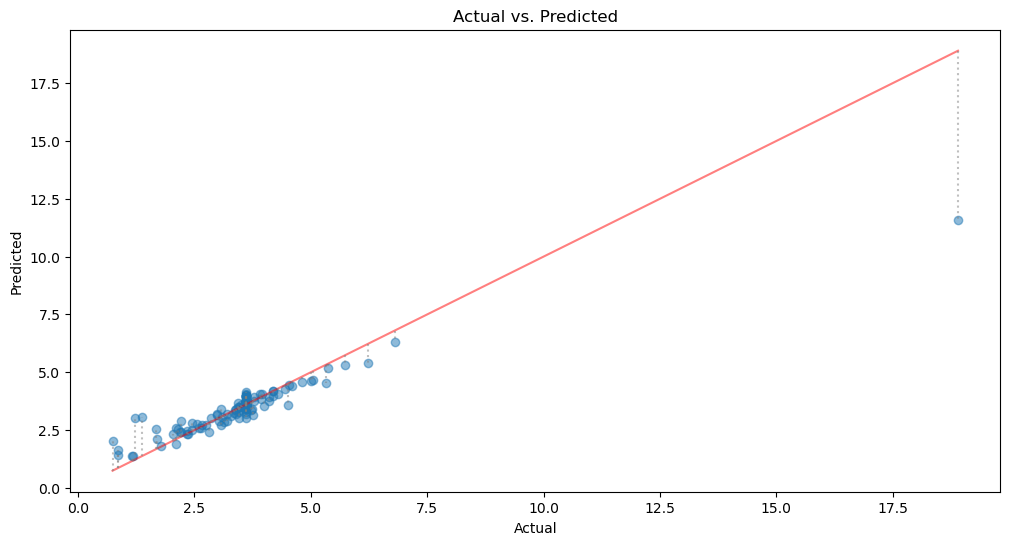

In [105]:
plt.figure(figsize = (12, 6))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', alpha = 0.5)
for actual, predicted in zip(y_test, y_pred):
    plt.plot([actual, actual], [actual, predicted], color = "grey", linestyle = ":", alpha = 0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

Text(0.5, 1.0, 'Residuals vs. Predicted')

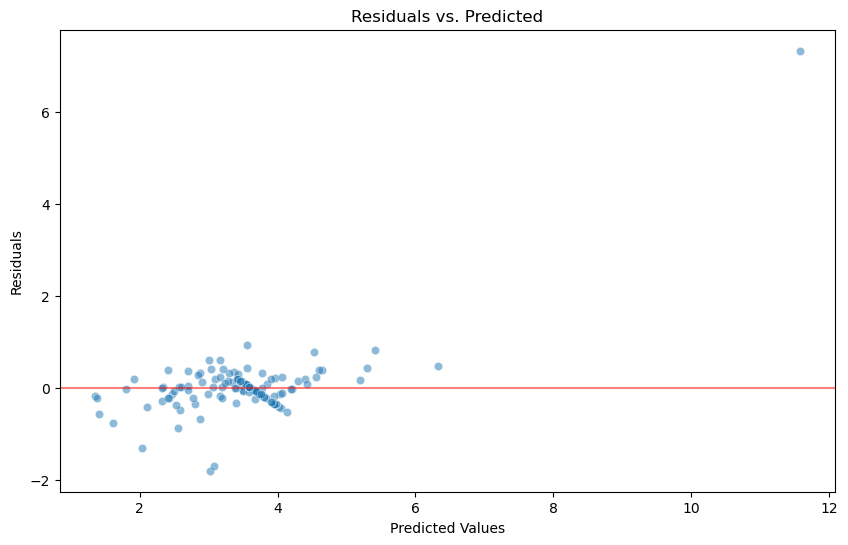

In [127]:
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha = 0.5)
plt.axhline(0, color='red', linestyle='-', alpha = 0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted")


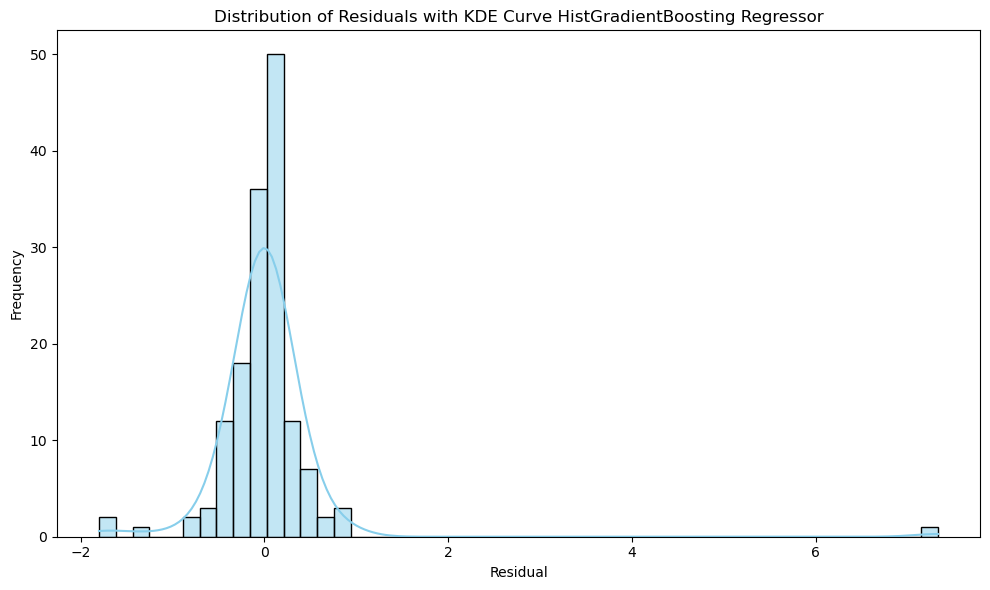

In [118]:
plt.figure(figsize = (10, 6))
sns.histplot(residuals, bins = 50, kde = True, color = "skyblue", edgecolor = "black")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals with KDE Curve HistGradientBoosting Regressor")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Q-Q Plot of Residuals HistGradient Boosting Regressor')

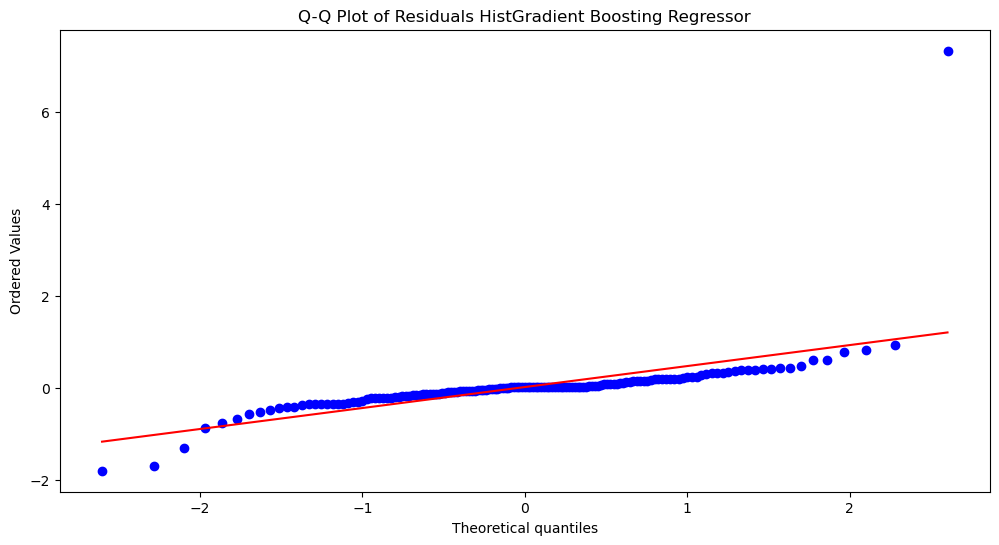

In [130]:
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals HistGradient Boosting Regressor")

/usr/lib/python3/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ExactExplainer explainer: 150it [00:12,  3.94it/s]                              
) missing from current font.on3.12/site-packages/shap/plots/_beeswarm.py:1150: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from current font.es/IPython/core/pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


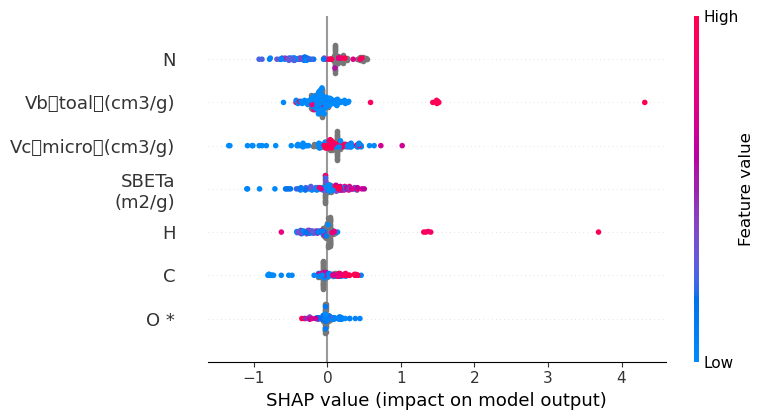

) missing from current font.on3.12/site-packages/shap/plots/_beeswarm.py:1150: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from current font.es/IPython/core/pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


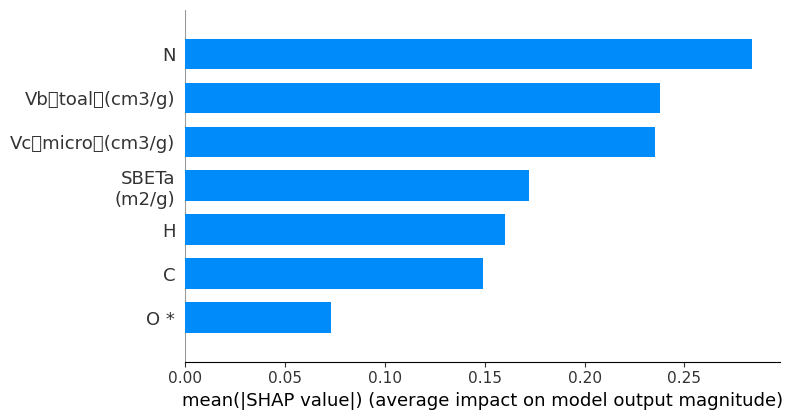

) missing from current font.es/IPython/core/pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


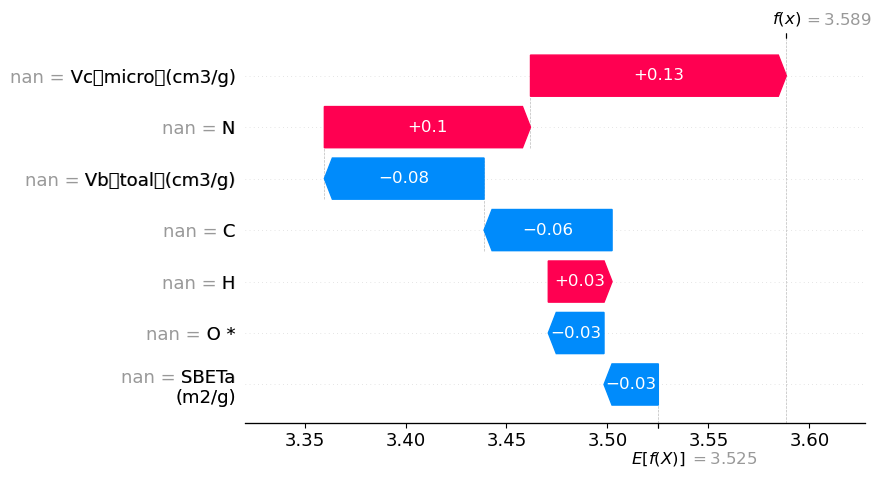

In [59]:
import shap
import matplotlib.pyplot as plt
shap.initjs()
# Create the SHAP explainer
explainer = shap.Explainer(model.predict, X_test)

# Calculate SHAP values
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

shap.plots.waterfall(shap_values[0])


In [64]:
from catboost import CatBoostRegressor

In [67]:
model = CatBoostRegressor(verbose = 0)

In [76]:
model.fit(X_train, y_train)

In [77]:
y_pred2 = model.predict(X_test)

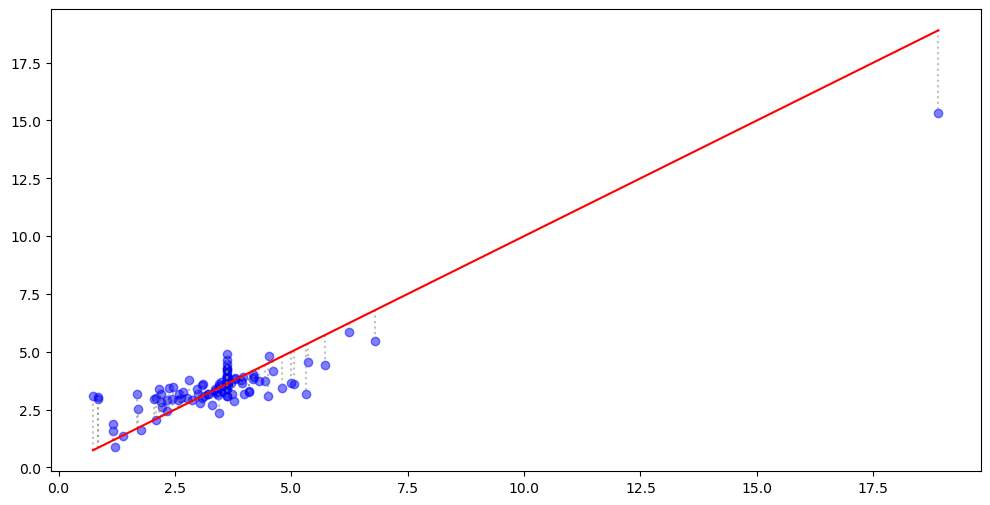

In [104]:
plt.figure(figsize = (12, 6))
plt.scatter(y_test, y_pred2, color = "blue", alpha = 0.5)
for actual, predicted in zip(y_test, y_pred2):
    plt.plot([actual, actual], [actual, predicted], color = "gray", linestyle = ":", alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = "red", linestyle = "-")

In [107]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred2))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred2))
print("R2 score: ", r2_score(y_test, y_pred2))

Mean Absolute Error:  0.4093503914846507
Mean Squared Error:  0.4752429069005425
R2 score:  0.8031140538466113


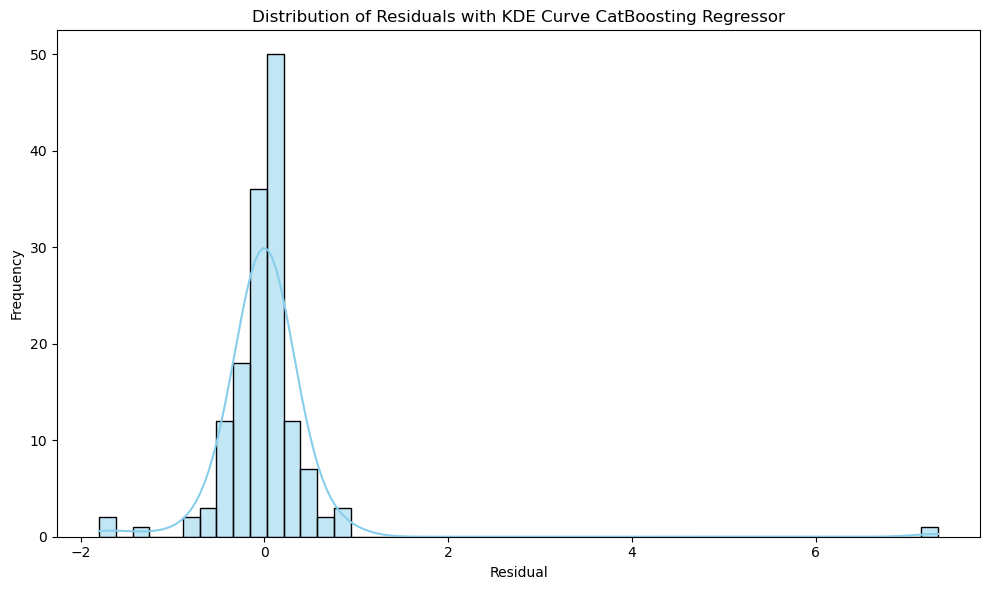

In [121]:
residuals2 = y_test - y_pred2
plt.figure(figsize = (10, 6))
sns.histplot(residuals, bins = 50, kde = True, color = "skyblue", edgecolor = "black")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals with KDE Curve CatBoosting Regressor")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Q-Q Plot of Residuals of CatBoosting Regressor')

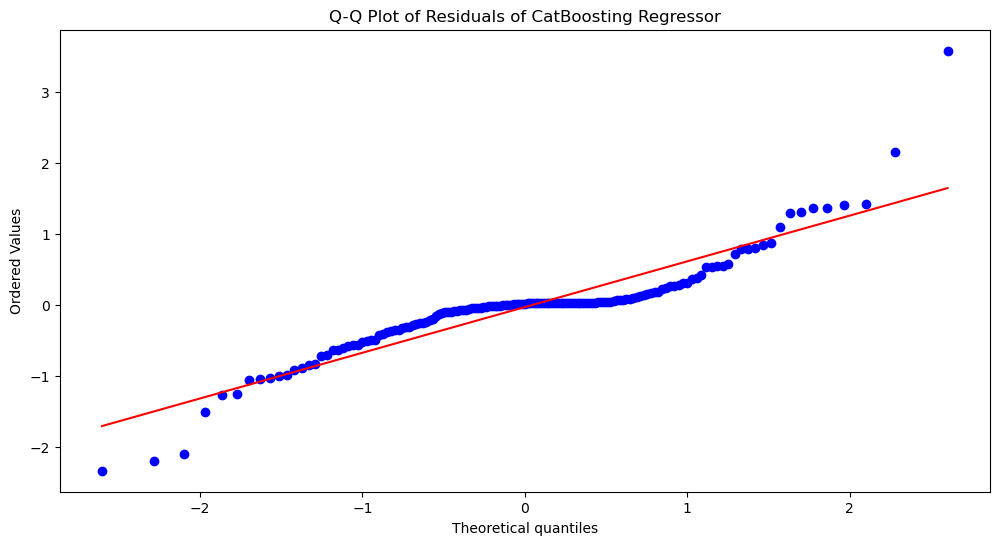

In [129]:
plt.figure(figsize  = (12, 6))
stats.probplot(residuals2, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals of CatBoosting Regressor")